Характеристики датасета

In [118]:
import pandas as pd 
Psy = pd.read_csv('Youtube01-Psy.csv')
KatyPerry = pd.read_csv('Youtube02-KatyPerry.csv')
LMFAO = pd.read_csv('Youtube03-LMFAO.csv')
Eminem = pd.read_csv('Youtube04-Eminem.csv')
Shakira = pd.read_csv('Youtube05-Shakira.csv')
data = pd.concat([Psy, KatyPerry, LMFAO, Eminem, Shakira])
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [119]:
data.shape

(1956, 5)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1956 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.7+ KB


In [121]:
data.isnull().sum().sort_values(ascending = False)

DATE          245
COMMENT_ID      0
AUTHOR          0
CONTENT         0
CLASS           0
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_17940\1579451069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CLASS', data =data, palette ='hls')


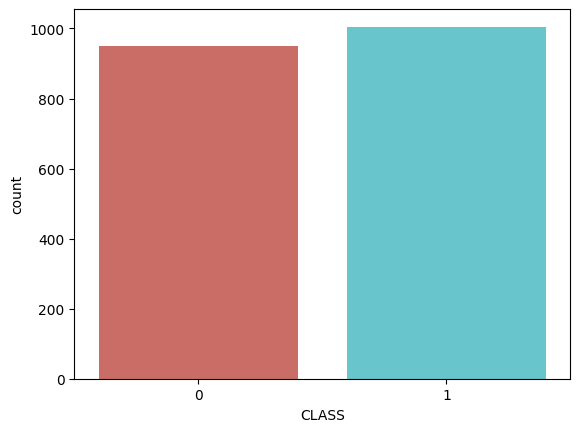

<Figure size 640x480 with 0 Axes>

In [122]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(x='CLASS', data =data, palette ='hls')
plt.show()
plt.savefig('count_plot')

Преобразование датасета

In [123]:
import numpy as np
def date_clear(date):
        date_str = str(date)
        if date_str in [None, np.nan, "b", "0", "None"]:
          return np.nan
    
        if "T" in date_str:
            split_datetime = date_str.split("T")
        else:
            split_datetime = date_str.split()
     
        date_part = split_datetime[0]
     
        formatted_date = date_part.replace("-", "/")
    
        return formatted_date



In [124]:
data["DATE"] = data["DATE"].apply(date_clear)

In [125]:
data.isnull().sum().sort_values(ascending = False)

COMMENT_ID    0
AUTHOR        0
DATE          0
CONTENT       0
CLASS         0
dtype: int64

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1956 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1956 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.7+ KB


In [127]:
import re
def content_clear(date):
    date_str = str(date)
    date_str = re.split(" ", date_str)   
    Link = "http"
    Link1 = "/watch"
    Nik = "@"
    Money = "$"
    new_str = ""
    for word in date_str:
        if Link in word:
            word = "weblink"
        if Link1 in word:
            word = "weblink"  
        if Nik in word:
            word = "nickname"  
        if Money in word:
            word = "valuemoney"    
        if any(char.isdigit() for char in word):
            word = "valuenumbers"   
        new_str += " "
        new_str += word

    return new_str

data["CONTENT"] = data["CONTENT"].apply(content_clear)


In [128]:
def content_clear1(text):
    strin = ""
    for i in text:
     text = re.sub("[^a-zA-Z]"," ",i) 
     strin += text
    
    _RE_COMBINE_WHITESPACE = re.compile(r"\s+")
    strin = _RE_COMBINE_WHITESPACE.sub(" ", strin).strip()
    strin = strin.lower()
    return strin 

data["CONTENT"] = data["CONTENT"].apply(content_clear1)
data.head(n=25)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013/11/07,huh anyway check out this you tube channel val...,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013/11/07,hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013/11/08,just for test i have to say murdev com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013/11/09,me shaking my sexy ass on my channel enjoy,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013/11/10,watch v vtarggvgtwq check this out,1
5,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013/11/26,hey check out my new website this site is abou...,1
6,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013/11/27,subscribe to my channel,1
7,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013/11/28,i turned it on mute as soon is i came on i jus...,0
8,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013/11/28,you should check my channel for funny videos,1
9,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013/11/28,and u should d check my channel and tell me wh...,1


In [129]:
data.to_csv('new_csv', index = False)

In [130]:
import nltk 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stop_word = set(stopwords.words('english'))
print(stop_word) 
ps = nltk.PorterStemmer()
def prepaing_text (text):
    text = word_tokenize(text)
    new_text = []
    for word in text:
        if word not in stopwords.words('english'):
            new_text.append(word)

    text = new_text[:]  
    new_text.clear()
    for word in text:
        new_text.append(ps.stem(word))

    return " ".join(new_text)  


{'m', 'that', "aren't", 'between', 'there', 'all', 'no', 'being', 'just', "you'll", 'won', 'on', 'our', 'doing', 'by', "weren't", 'you', 'your', 'here', 'be', 'had', 'about', "hadn't", "haven't", 'mustn', 'should', 'ain', 'don', "wouldn't", 'under', 'do', 'each', "shan't", 'from', 'didn', 'been', 'the', 'they', 'who', 't', 'it', 'theirs', 'those', 'themselves', 'so', 'over', 'he', 'through', 'once', 'until', 'wasn', 'this', 'yourselves', 'is', 'nor', 'ourselves', "you're", 'than', 'into', 'in', 'can', 'y', "needn't", "she's", 'down', 'will', 'their', 'too', 'we', 'were', 'did', "mustn't", 'most', 'off', 'very', 'own', 'couldn', 'doesn', "that'll", "you'd", 'few', 'its', 'not', 'shan', 'himself', 'am', 'against', "don't", 'have', 'while', "didn't", 'his', "hasn't", 'further', 'aren', 'to', 'd', 'o', 'where', 'her', "couldn't", 'whom', 'wouldn', 'an', 've', 'hers', 'after', "it's", 'mightn', "doesn't", 'yours', 'how', 'only', 's', 'me', "shouldn't", 'herself', 'out', 'these', 'again', 'b

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [131]:
def text_split (text):
    text = word_tokenize(text)
    new_text = []
    for word in text:
        new_text.append(word)

    return new_text

In [132]:

data["CONTENT"] = data["CONTENT"].apply(prepaing_text)
new_text = data["CONTENT"]
new_text = new_text.apply(text_split)
new_text


0         [huh, anyway, check, tube, channel, valuenumb]
1      [hey, guy, check, new, channel, first, vid, us...
2                               [test, say, murdev, com]
3                     [shake, sexi, ass, channel, enjoy]
4                         [watch, v, vtarggvgtwq, check]
                             ...                        
365                       [love, song, sing, camp, time]
366    [love, song, two, reason, valuenumb, africa, v...
367                                                [wow]
368                                 [shakira, u, wiredo]
369                              [shakira, best, dancer]
Name: CONTENT, Length: 1956, dtype: object

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(data["CONTENT"])
feature_names = vectorizer.get_feature_names_out()
feature = pd.DataFrame(x.toarray(), columns = feature_names)

#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(max_features = 2000)
#x = vectorizer.fit_transform(data["CONTENT"])
y = data["CLASS"]

Случайные леса

In [134]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print("Traning: ", x_train.shape, " testing: ", x_test.shape)

Traning:  (1467, 2849)  testing:  (489, 2849)


In [135]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier()
tree.fit(x_train, y_train)
y_tree = tree.predict(x_test)

In [136]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score, recall_score, f1_score, balanced_accuracy_score
print(accuracy_score(y_test,y_tree))

0.9652351738241309


In [137]:
print(confusion_matrix(y_test,y_tree))

[[228   1]
 [ 16 244]]


In [138]:
from sklearn.metrics import log_loss
results = []
results.append({"model": "RF", 
 "logloss": log_loss(y_test, y_tree),
 "accuracy": accuracy_score(y_test, y_tree),
 "weighed_accuracy": 
balanced_accuracy_score(y_test, y_tree),
 "precision": precision_score(y_test, y_tree),
 "recall": recall_score(y_test, y_tree),
 "f1": f1_score(y_test, y_tree),
 })
pd.DataFrame(results)

,model,logloss,accuracy,weighed_accuracy,precision,recall,f1
0,RF,1.253051,0.965235,0.967047,0.995918,0.938462,0.966337


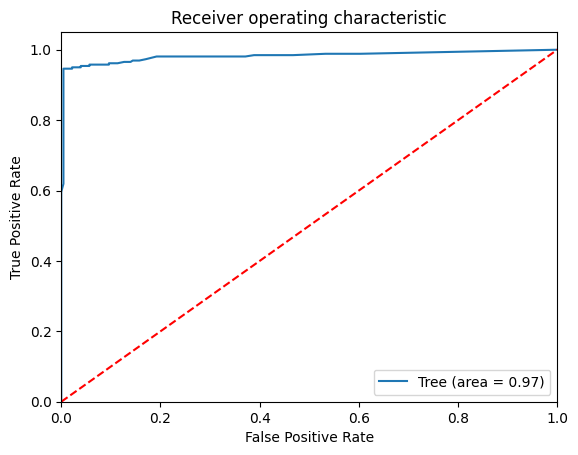

In [139]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
tree_roc_auc = roc_auc_score(y_test, tree.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Tree (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Tree_ROC')
plt.show()

LSTM

In [140]:
import tensorflow as tf
from keras.preprocessing import sequence
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(new_text)
print(len(tokenizer.word_index))
sequences = tokenizer.texts_to_sequences(new_text)
max_seq_len = np.max(list(map(len, sequences)))
X_preparing = sequence.pad_sequences(sequences,maxlen=max_seq_len)
print(X_preparing.shape[1])

2865
99


In [141]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_preparing, data['CLASS'], test_size = 0.25, random_state = 1)

In [142]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding,LSTM
model1 = Sequential()
model1.add(Embedding(3000, 100))
model1.add(LSTM(8))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()
model1.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])
model1.fit(X1_train,Y1_train,epochs=10,validation_data=(X1_test,Y1_test),batch_size=64)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         300000    
                                                                 
 lstm_4 (LSTM)               (None, 8)                 3488      
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 303497 (1.16 MB)
Trainable params: 303497 (1.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
23/23 [==============================] - 3s 59ms/step - loss: 0.6937 - accuracy: 0.4724 - val_loss: 0.6914 - val_accuracy: 0.5562
Epoch 2/10
23/23 [==============================] - 1s 32ms/step - loss: 0.6925 - accuracy: 0.5392 - val_loss: 0.6902 - val_accuracy: 0.5971


In [143]:

results = model1.evaluate(X1_test, Y1_test, verbose = 0)
print(f'Accuracy : {round(results[0]*100, 4)}%')
y_pred = np.squeeze(model1.predict(X1_test) >= 0.5).astype(np.int64)
print(confusion_matrix(Y1_test,y_pred))

Accuracy : 68.0824%
16/16 [==============================] - 0s 6ms/step
[[166  63]
 [ 92 168]]


In [144]:
results1 = []
results1.append({"model": "RF", 
 "logloss": log_loss(Y1_test, y_pred),
 "accuracy": accuracy_score(Y1_test, y_pred),
 "weighed_accuracy": 
balanced_accuracy_score(Y1_test, y_pred),
 "precision": precision_score(Y1_test, y_pred),
 "recall": recall_score(Y1_test, y_pred),
 "f1": f1_score(Y1_test, y_pred),
 })
pd.DataFrame(results1)

,model,logloss,accuracy,weighed_accuracy,precision,recall,f1
0,RF,11.42488,0.683027,0.685522,0.727273,0.646154,0.684318


16/16 [==============================] - 0s 7ms/step


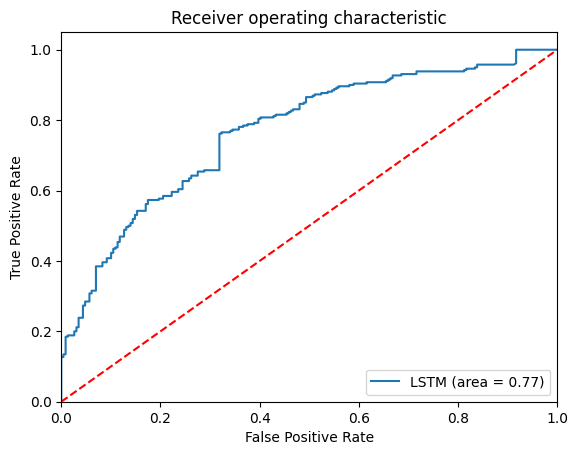

In [145]:
lstm_roc_auc = roc_auc_score(Y1_test, model1.predict(X1_test))
fpr, tpr, thresholds = roc_curve(Y1_test, model1.predict(X1_test))
plt.figure()
plt.plot(fpr, tpr, label='LSTM (area = %0.2f)' % lstm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LSTM_ROC')
plt.show()